In [1]:
import sklearn
import sklearn.ensemble as ensemble
ensemble.__all__

['BaseEnsemble',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'IsolationForest',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'AdaBoostClassifier',
 'AdaBoostRegressor',
 'VotingClassifier',
 'VotingRegressor',
 'StackingClassifier',
 'StackingRegressor']

In [2]:
import pandas as pd
xigua30 = pd.read_csv('xigua3.0.a.csv', index_col=0)
x=xigua30[["密度","含糖率"]].values
y=xigua30[["好瓜"]].values.flatten()
xy = sklearn.model_selection.train_test_split(x,y,random_state=123)
x,y

(array([[0.697, 0.46 ],
        [0.774, 0.376],
        [0.634, 0.264],
        [0.608, 0.318],
        [0.556, 0.215],
        [0.403, 0.237],
        [0.481, 0.149],
        [0.437, 0.211],
        [0.666, 0.091],
        [0.243, 0.267],
        [0.245, 0.057],
        [0.343, 0.099],
        [0.639, 0.161],
        [0.657, 0.198],
        [0.36 , 0.37 ],
        [0.593, 0.042],
        [0.719, 0.103]]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
       dtype=int64))

In [3]:
model = ensemble.AdaBoostClassifier(n_estimators=1)
model.fit(xy[0],xy[2])
print(model.score(xy[0],xy[2]),model.score(xy[1],xy[3]))

0.8333333333333334 0.6


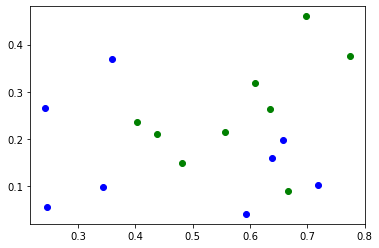

In [4]:
xigua30apos = xigua30[xigua30['好瓜']==1].values
xigua30aneg = xigua30[xigua30['好瓜']==-1].values
import  matplotlib.pyplot as plt
plt.scatter(xigua30apos[:,0],xigua30apos[:,1],c='green')
plt.scatter(xigua30aneg[:,0],xigua30aneg[:,1],c='blue')
plt.show()

In [5]:
import numpy as np
def disp_pos_neg(model, disp_scale=100.0):
    disp_input = []
    for i in range(int(disp_scale)):
        for j in range(int(disp_scale)):
            disp_input.append([i/disp_scale,j/disp_scale])
    disp_predict = model.predict(disp_input)
    disp_pos = []
    disp_neg = []
    for x, disp_x in zip(disp_input,disp_predict):
        if disp_x == 1:
            disp_pos.append(x)
        else:
            disp_neg.append(x)
    disp_pos=np.array(disp_pos)
    disp_neg=np.array(disp_neg)
    return disp_pos, disp_neg

disp_pos, disp_neg = disp_pos_neg(model)
disp_pos, disp_neg

(array([[0.  , 0.21],
        [0.  , 0.22],
        [0.  , 0.23],
        ...,
        [0.99, 0.97],
        [0.99, 0.98],
        [0.99, 0.99]]),
 array([[0.  , 0.  ],
        [0.  , 0.01],
        [0.  , 0.02],
        ...,
        [0.99, 0.18],
        [0.99, 0.19],
        [0.99, 0.2 ]]))

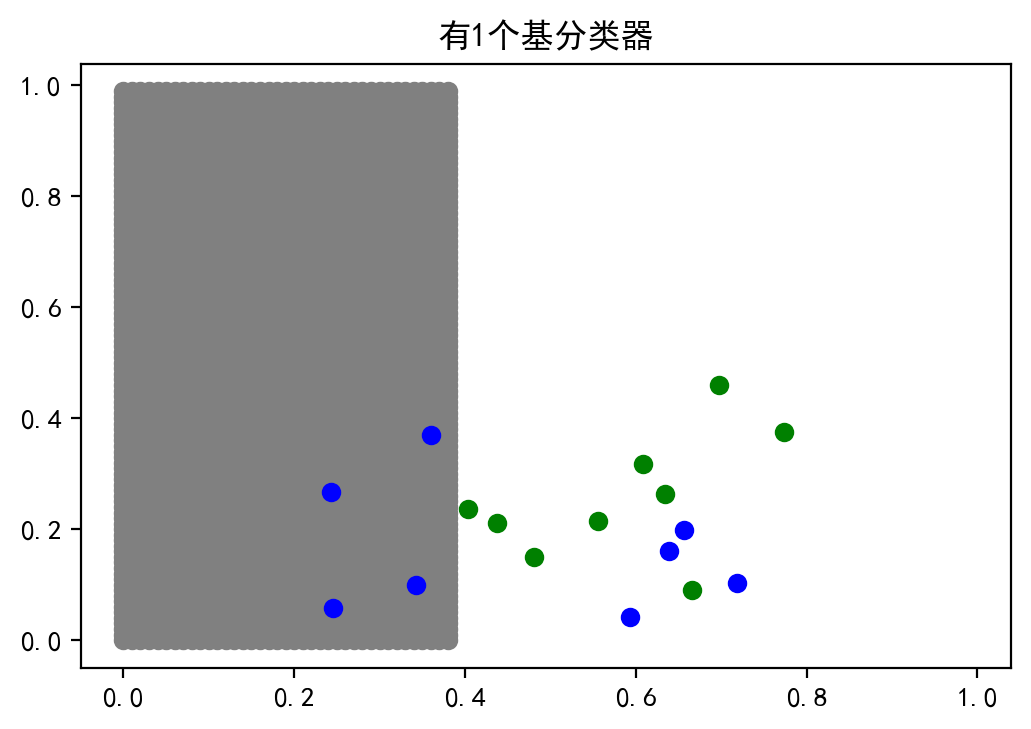

In [6]:
import  matplotlib
import  matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']=200
matplotlib.rcParams['font.sans-serif']=['simhei']
def dis_all(n_estimators):
    model = ensemble.AdaBoostClassifier(n_estimators=n_estimators)
    model.fit(x,y)
    disp_pos, disp_neg = disp_pos_neg(model)
    plt.scatter(disp_pos[:,0],disp_pos[:,1],c='white')
    plt.scatter(disp_neg[:,0],disp_neg[:,1],c='grey')
    plt.scatter(xigua30apos[:,0],xigua30apos[:,1],c='green')
    plt.scatter(xigua30aneg[:,0],xigua30aneg[:,1],c='blue')
    plt.title("有"+str(n_estimators)+"个基分类器")
    plt.show()
dis_all(1)

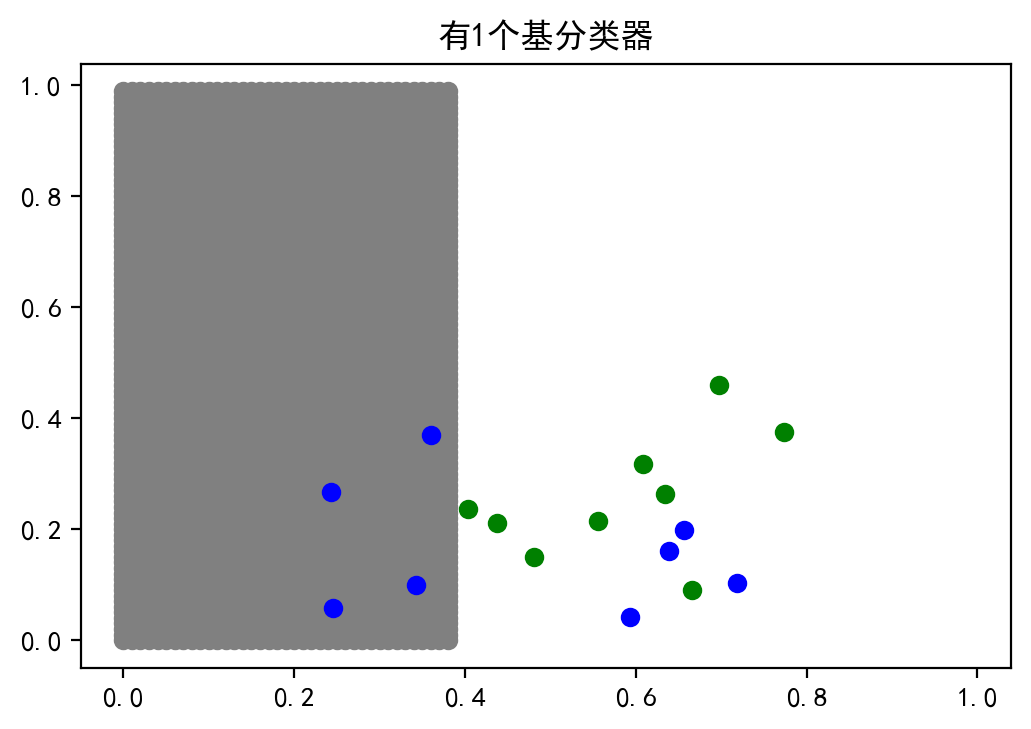

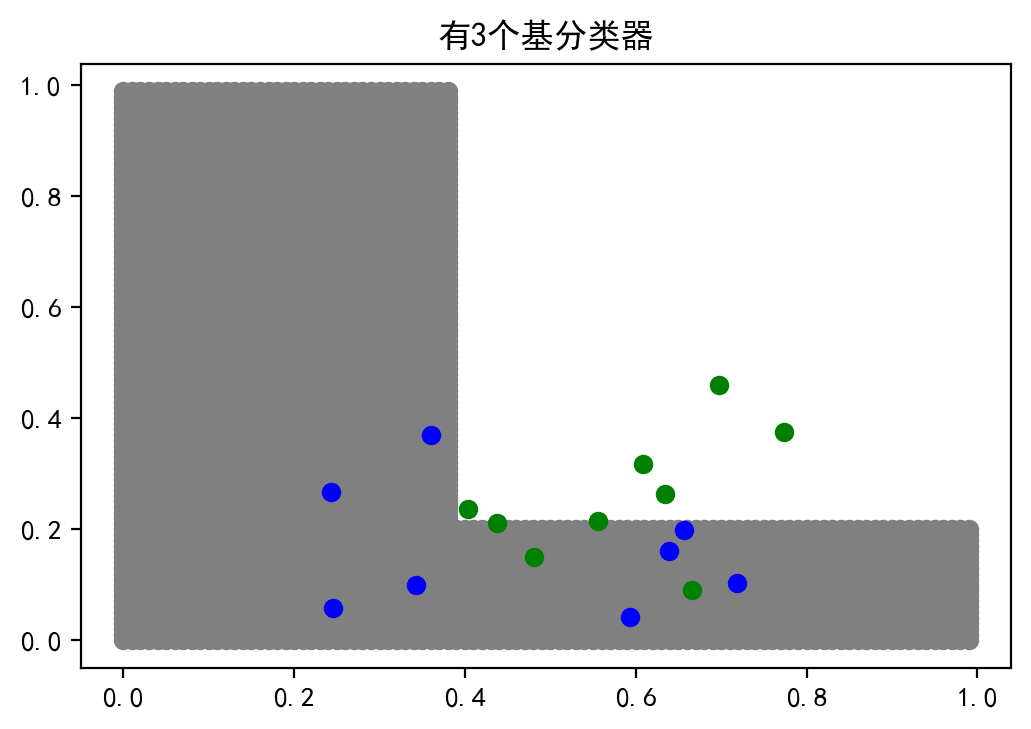

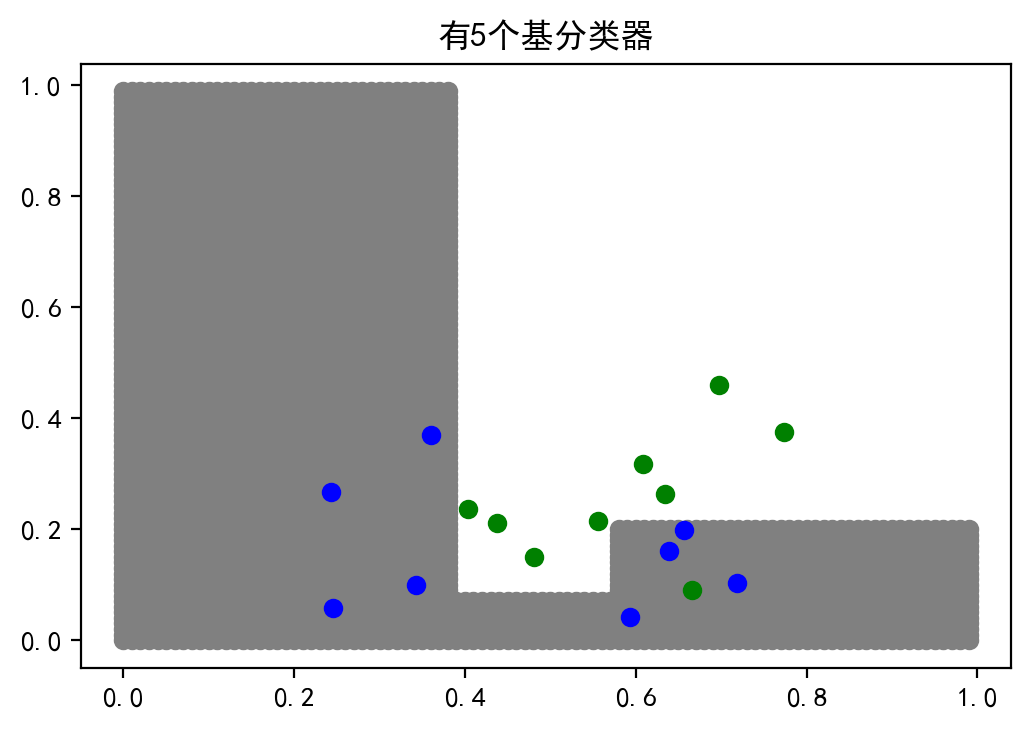

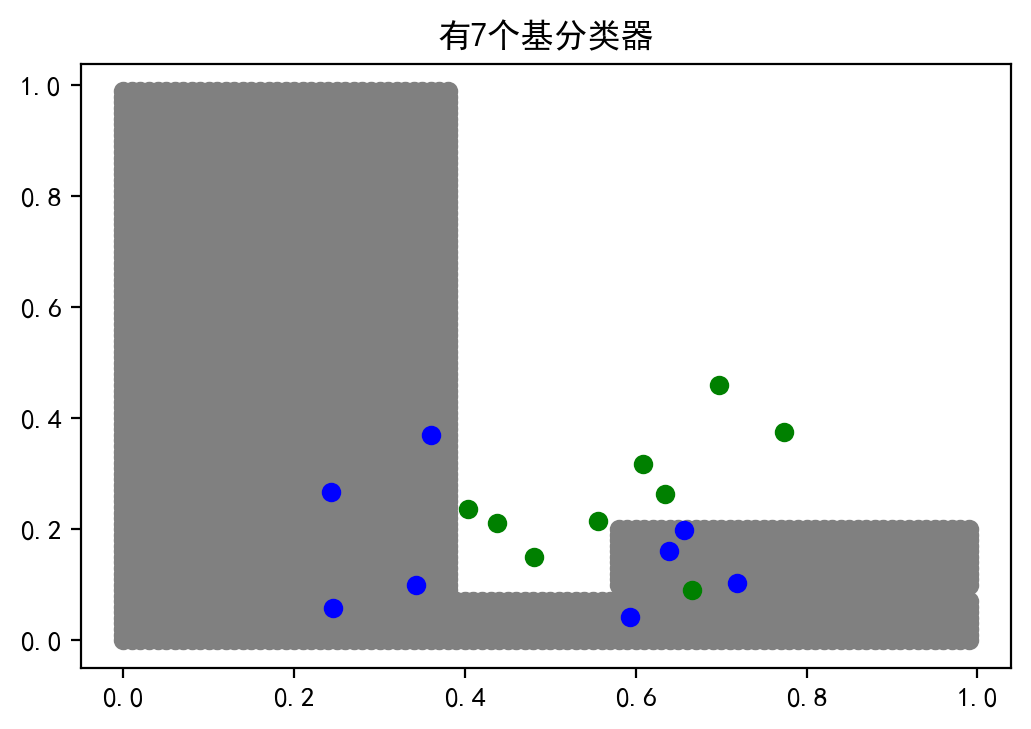

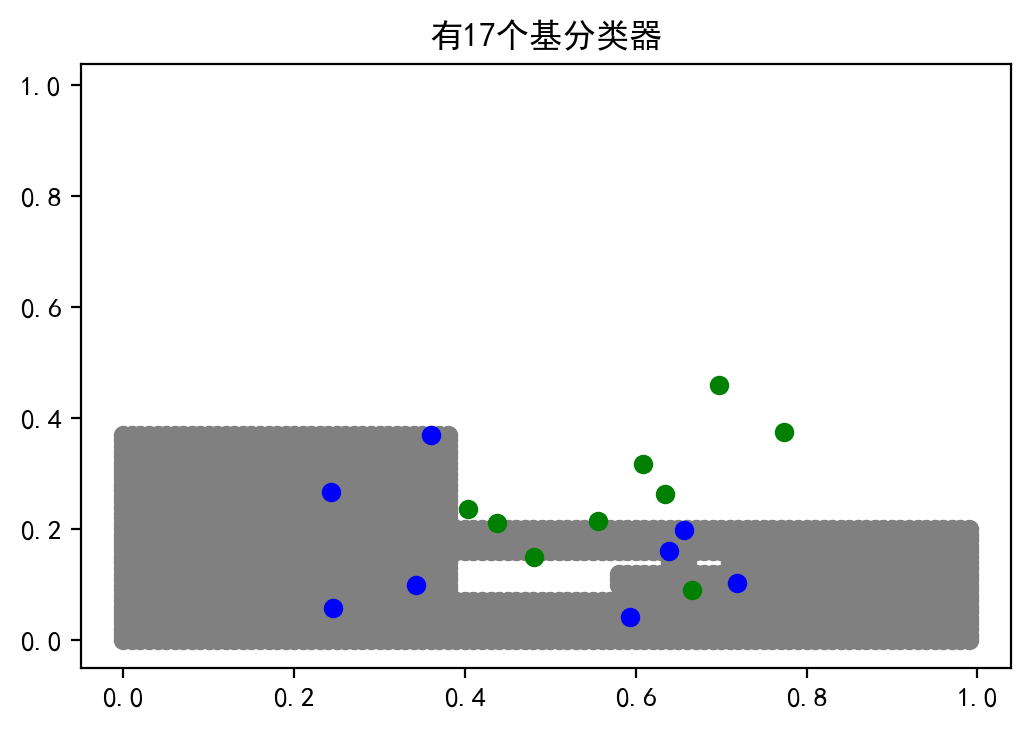

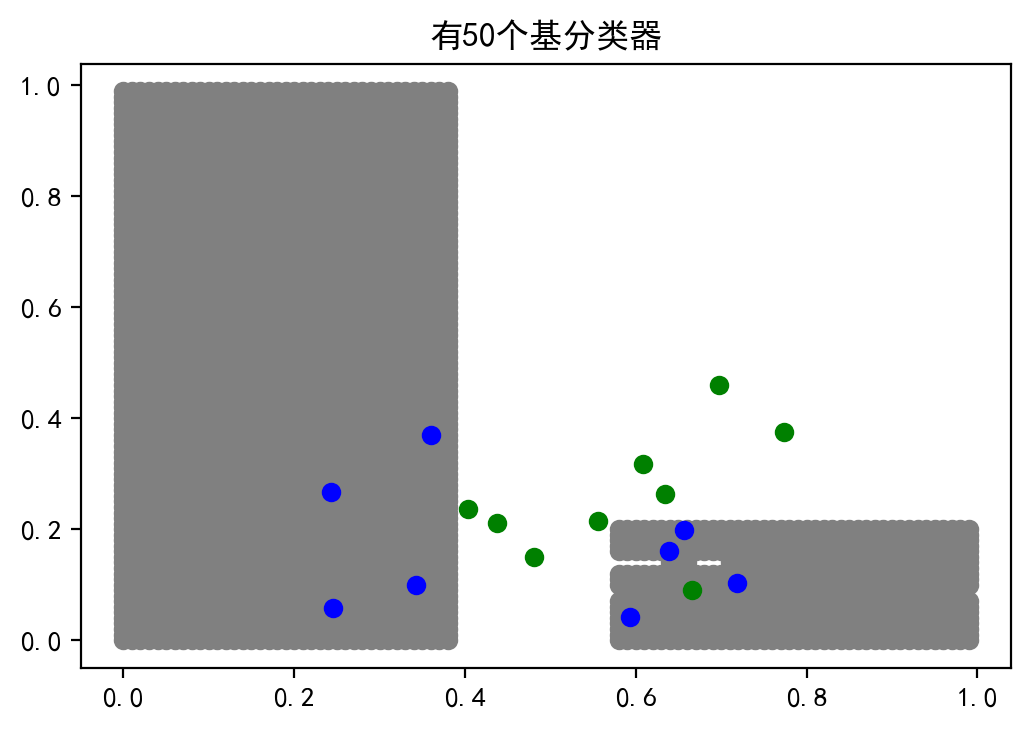

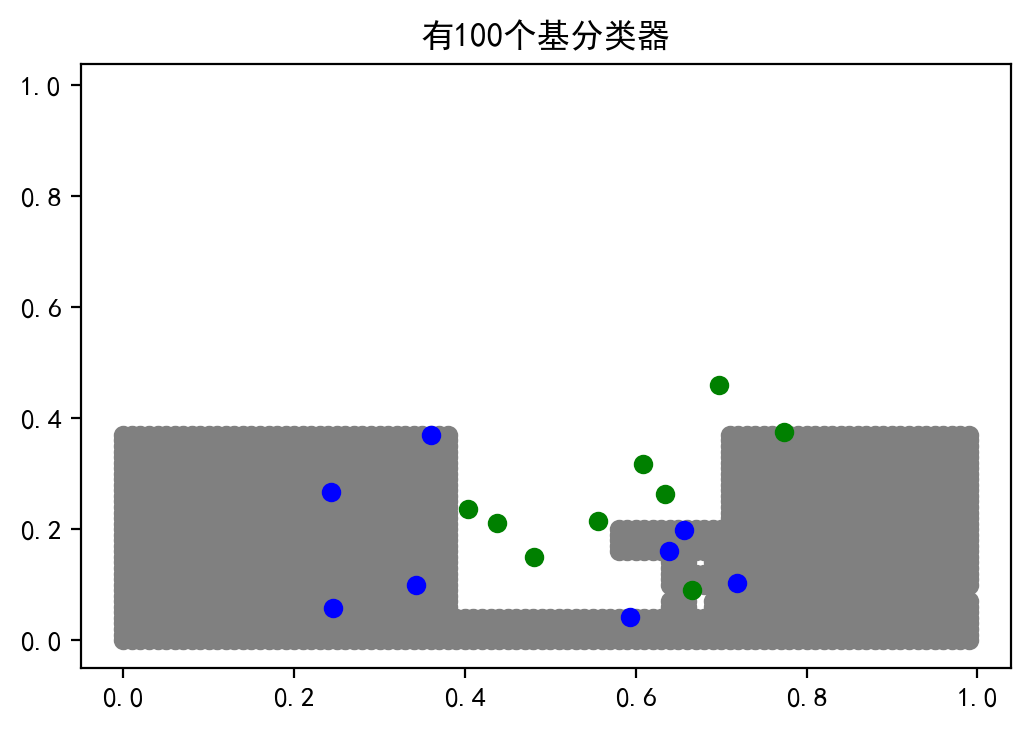

In [7]:
dis_all(1)
dis_all(3)
dis_all(5)
dis_all(7)
dis_all(17)
dis_all(50)
dis_all(100)

In [8]:
import  sklearn.datasets as datasets
boston = datasets.load_boston()
threshold = np.mean(boston.target)
y_classfiy=  [1 if yi > threshold else -1 for yi in boston.target]
xy = sklearn.model_selection.train_test_split(boston.data, y_classfiy, random_state=123)
x = boston.data
y = y_classfiy
xy

[array([[3.96100e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
         3.96900e+02, 8.01000e+00],
        [3.32105e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         3.96900e+02, 2.68200e+01],
        [1.20742e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         2.92290e+02, 1.44300e+01],
        ...,
        [3.51140e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
         3.96900e+02, 7.70000e+00],
        [9.18702e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.96900e+02, 2.36000e+01],
        [4.55587e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.54700e+02, 7.12000e+00]]),
 array([[5.11358e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         2.60000e+00, 1.01100e+01],
        [5.73500e-02, 0.00000e+00, 4.49000e+00, ..., 1.85000e+01,
         3.92300e+02, 6.53000e+00],
        [3.57800e-02, 2.00000e+01, 3.33000e+00, ..., 1.49000e+01,
         3.87310e+02, 3.76000e+00],
        ...,
        [1.25179e+00, 0.00000e+00, 8.14000e+00, ..., 2

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

model = ensemble.AdaBoostClassifier()
model.fit(xy[0],xy[2])
print(model.score(xy[0],xy[2]),model.score(xy[1],xy[3]))

model = ensemble.RandomForestClassifier()
model.fit(xy[0],xy[2])
print(model.score(xy[0],xy[2]),model.score(xy[1],xy[3]))

estimators = [
         ('rf', ensemble.RandomForestClassifier(n_estimators=10, random_state=42)),
         ('svr', make_pipeline(StandardScaler(),
                                  LinearSVC(random_state=42)))
]
clf = StackingClassifier(
         estimators=estimators, final_estimator=LogisticRegression()
     )
model = ensemble.StackingClassifier(estimators=estimators)
model.fit(xy[0],xy[2])
print(model.score(xy[0],xy[2]),model.score(xy[1],xy[3]))



0.9551451187335093 0.8503937007874016
1.0 0.9133858267716536
0.9736147757255936 0.9133858267716536
